# Extractive Text Summarization

- Text summarization is commonly used by several websites and applications to create news feed and article summaries.
- Summarization is a technique to shorten long texts such that the summary has all the important points of the actual document.

### Type of Summarization
- **Extractive Summarization**: The extractive approach involves picking up the most important phrases and lines from the documents.
- **Abstractive Summarization**: it uses new phrases and terms, different from the actual document, keeping the points the same, just like how we actually summarize. So, it is much harder than the extractive approach.



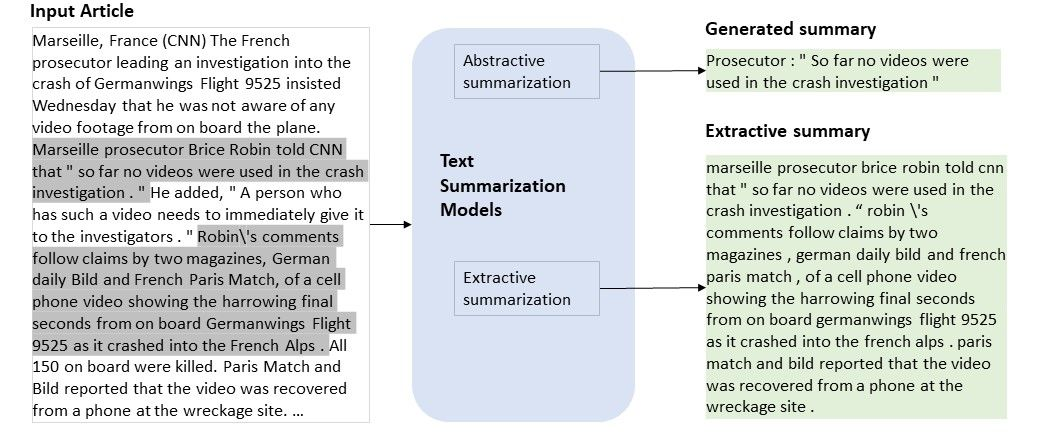

In [ ]:
!pip install -U sentence-transformers

In [ ]:
from sentence_transformers import SentenceTransformer, util


In [ ]:
from LexRank import degree_centrality_scores

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import numpy as np

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
document = """
Immediately after the verdict, in a statement released through her spokesperson, Amber had said she was ‘sad’ she had ‘lost the case’. The jury had also found Johnny guilty of defamation on one count and ordered him to pay Amber $2 million in damages. However, most legal experts said the case had been vindication for Johnny.
Speaking about it on Today Show, Amber said about the jury, “I don’t blame them. I actually understand. He’s a beloved character and people feel they know him. He’s a fantastic actor.”
The actor also addressed the memes that have been made about her and the hate coming her way on social media through the trial. She said, “I don’t care what one thinks about me or what judgments you want to make about what happened in the privacy of my own home, in my marriage, behind closed doors. I don’t presume the average person should know those things. And so I don’t take it personally. But even somebody who is sure I’m deserving of all this hate and vitriol, even if you think that I’m lying, you still couldn’t look me in the eye and tell me that you think on social media there’s been a fair representation. You cannot tell me that you think that this has been fair.”
"""

In [ ]:
sentences = nltk.sent_tokenize(document)

In [ ]:
print(len(sentences))

12


In [ ]:
embeddings = model.encode(sentences, convert_to_tensor=True)

In [ ]:
cos_scores = util.cos_sim(embeddings, embeddings).cpu().numpy()

In [ ]:
cos_scores.shape

(12, 12)

In [ ]:
centrality_score = degree_centrality_scores(cos_scores, threshold=None)

In [ ]:
most_centrality_sentence_indices = np.argsort(-centrality_score)

In [ ]:
most_centrality_sentence_indices

array([ 3,  1,  2,  6,  0,  7, 10, 11,  9,  4,  5,  8])

In [ ]:
for id in most_centrality_sentence_indices[:3]:
  print(sentences[id].strip())

Speaking about it on Today Show, Amber said about the jury, “I don’t blame them.
The jury had also found Johnny guilty of defamation on one count and ordered him to pay Amber $2 million in damages.
However, most legal experts said the case had been vindication for Johnny.
